In [10]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import pandas as pd
import wfdb
from tqdm import tqdm

from data_functions import load_data, plot_data

In [7]:
chunk_size = 10000
nb_files = 92

In [18]:
#Créer une base de donnée de tronçons de 10000 points

data = {}

i = 0

for file in tqdm(range(1, nb_files)): 
    
    if file < 10:
        filename = "./data/mimic/p090373/3058899_000"+str(file)
    else:
        filename = "./data/mimic/p090373/3058899_00" + str(file)
    record = wfdb.rdrecord(filename) 
    
    if "RESP" in record.sig_name:
        ind = (record.sig_name).index("RESP")
        resp = record.p_signal[:,ind]
        nb_chunks = int(len(resp)/chunk_size)
        for chunk in range(nb_chunks):
            if (resp[chunk_size*chunk : chunk_size*(chunk+1)]>=1.).any() or (resp[chunk_size*chunk : chunk_size*(chunk+1)]<=0).any():
                pass
            else:
                data["V" + str(i)] = resp[chunk_size*chunk : chunk_size*(chunk+1)]
                i = i + 1
    else: 
        pass
  
df = pd.DataFrame(data=data)
df.to_csv("./data/mimic/mimic.csv", encoding='utf-8', index=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 91/91 [00:04<00:00, 22.33it/s]


(10000, 1173)


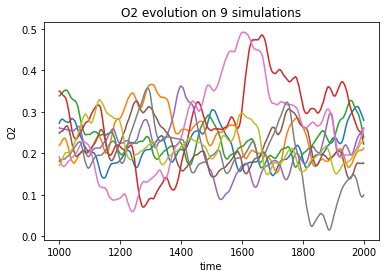

In [19]:
print(df.shape)
var = ['V' + str(i) for i in range(1,10)]
df1 = df[var][1000:2000]
plot_data(df1)

In [20]:
len(data)

1173

0.025


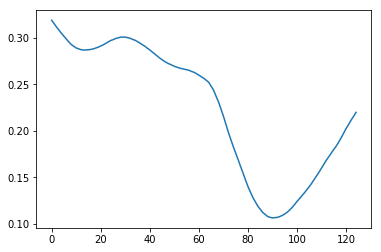

In [23]:

ind = (record.sig_name).index("RESP")
print(2*len(record.p_signal[:,ind])/chunk_size)
plt.plot(record.p_signal[:,ind])
plt.show()

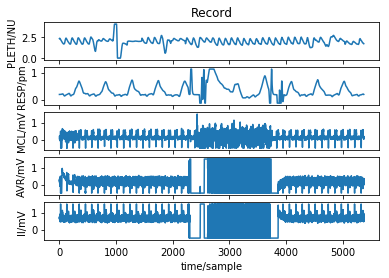

{'adc_gain': [1023.0, 3250.0, 2046.0, 2048.0, 2048.0],
 'adc_res': [12, 12, 12, 12, 12],
 'adc_zero': [2048, 2048, 2048, 2048, 2048],
 'base_counter': None,
 'base_date': None,
 'base_time': '10:02:44.149',
 'baseline': [0, 423, 1024, 1023, 1023],
 'block_size': [0, 0, 0, 0, 0],
 'byte_offset': [None, None, None, None, None],
 'checksum': [-28037, 5757, 15137, 29329, 16136],
 'comments': [],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['3058899_0011.dat',
  '3058899_0011.dat',
  '3058899_0011.dat',
  '3058899_0011.dat',
  '3058899_0011.dat'],
 'fmt': ['16', '16', '16', '16', '16'],
 'fs': 125,
 'init_value': [2348, 1042, 1126, 1525, 2405],
 'n_sig': 5,
 'p_signal': array([[ 2.29521017,  0.19046154,  0.04985337,  0.24511719,  0.67480469],
        [ 2.30498534,  0.19076923,  0.14467253,  0.18017578,  0.73486328],
        [ 2.31573803,  0.19138462,  0.17497556,  0.31982422,  0.63476562],
        ..., 
        [ 1.71652004,  0.19723077,

In [25]:
record = wfdb.rdrecord("./data/mimic/p090373/3058899_0011")#p090373/3058899_0001") 

wfdb.plot_wfdb(record=record, title='Record') 
display(record.__dict__)


## Distance on df

In [44]:
# Poids des ressorts
weights = [0., 0.0425034, 0.02624669, 0.30339451, 0.16850823, 0.23280556, 0.14751689, 0.07902472]

In [29]:
df.shape

(10000, 1173)

In [35]:
from sklearn import preprocessing
from descriptor import compute_descriptor
from wasserstein_distance import compute_wasserstein_distance
from kolmogorov_distance import compute_kolmogorov_dist
from data_functions import load_data, plot_data
import simu_ressort

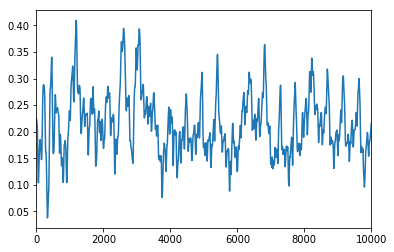

In [34]:
df['V0'].plot()
plt.show()

### Normalize

In [45]:
for var in df.columns:
    df[var] = preprocessing.scale(df[var])

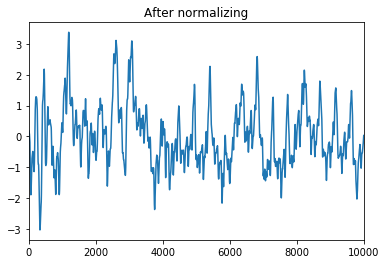

In [40]:
df['V0'].plot()
plt.title("After normalizing")
plt.show()

In [42]:
len(df.columns)

1173

### Faire des groupes de signaux

In [55]:
def compute_dist_sets(sets, weights, name):
    distances = []
    params = []
    
    for data1 in tqdm(sets):
        for data2 in tqdm(sets):
            kolm_dist = compute_kolmogorov_dist(data1, data2, weights=weights)
            wasser_dist = compute_wasserstein_distance(data1, data2, weights=weights)
            distances.append([kolm_dist, wasser_dist])
            
        # Re enregistre à chaque fois au cas ou ca plante
        simu_ressort.save_obj(distances, './data/mimic/distances_' + name + '.pkl')
            
    return np.array(distances)

In [56]:
nb_group = 4

col_rand = np.random.permutation(df.columns)
size_group = int(len(col_rand) / nb_group)

sets = []
for i in range(nb_group):
    sets.append(df[col_rand[i*size_group:(i+1)*size_group]])

In [57]:
compute_dist_sets(sets, weights, '4')

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]D:\Cours\Ponts\MVA\ACTERREA\Code\acterrea\descriptor.py:8: RuntimeWarning: invalid value encountered in double_scalars
  sm = np.sum(fft*(freq**i))/np.sum(fft)

 75%|██████████████████████████████████████████████████████████████▎                    | 3/4 [18:33<06:11, 371.21s/it]


KeyboardInterrupt: 